In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
df = pd.read_csv('quikr_car.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 21.0+ KB


# Data Cleaning
#### year is object !

In [167]:
df.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [168]:
df = df[df.year.str.isnumeric()]
df.year = df.year.astype(int)
df.year.unique()

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

### price is object , numbers seperated by , and have non int values

In [169]:
df.Price.unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [170]:
df = df[df.Price.str.replace("," , "").str.isnumeric()]
df.Price = df.Price.str.replace(",", "").astype(float)
df.Price.unique()

array([  80000.,  425000.,  325000.,  575000.,  175000.,  190000.,
        830000.,  250000.,  182000.,  315000.,  415000.,  320000.,
       1000000.,  500000.,  350000.,  160000.,  310000.,   75000.,
        100000.,  290000.,   95000.,  180000.,  385000.,  105000.,
        650000.,  689999.,  448000.,  549000.,  501000.,  489999.,
        280000.,  349999.,  284999.,  345000.,  499999.,  235000.,
        249999., 1475000.,  395000.,  220000.,  170000.,   85000.,
        200000.,  570000.,  110000.,  448999., 1891111.,  159500.,
        344999.,  449999.,  865000.,  699000.,  375000.,  224999.,
       1200000.,  195000.,  351000.,  240000.,   90000.,  155000.,
        600000.,  189500.,  210000.,  390000.,  135000., 1600000.,
        701000.,  265000.,  525000.,  372000.,  635000.,  550000.,
        485000.,  329500.,  251111.,  569999.,   69999.,  299999.,
        399999.,  450000.,  270000.,  158400.,  179000.,  125000.,
        299000.,  150000.,  275000.,  285000.,  340000.,   700

### kms_driven is object

In [171]:
df.kms_driven.unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [172]:
df.kms_driven = df.kms_driven.str.replace(",","").str.replace(" kms", "")
df = df[df.kms_driven.str.isnumeric()]
df.kms_driven = df.kms_driven.astype(float)
df.kms_driven.unique()

array([4.50000e+04, 4.00000e+01, 2.80000e+04, 3.60000e+04, 4.10000e+04,
       2.50000e+04, 2.45300e+04, 6.00000e+04, 3.00000e+04, 3.20000e+04,
       4.86600e+04, 4.00000e+03, 1.69340e+04, 4.30000e+04, 3.55500e+04,
       3.95220e+04, 3.90000e+04, 5.50000e+04, 7.20000e+04, 1.59750e+04,
       7.00000e+04, 2.34520e+04, 3.55220e+04, 4.85080e+04, 1.54870e+04,
       8.20000e+04, 2.00000e+04, 6.80000e+04, 3.80000e+04, 2.70000e+04,
       3.30000e+04, 4.60000e+04, 1.60000e+04, 4.70000e+04, 3.50000e+04,
       3.08740e+04, 1.50000e+04, 2.96850e+04, 1.30000e+05, 1.90000e+04,
       5.40000e+04, 1.30000e+04, 3.82000e+04, 2.20000e+04, 5.00000e+04,
       1.35000e+04, 3.60000e+03, 4.58630e+04, 6.05000e+04, 1.25000e+04,
       1.80000e+04, 1.33490e+04, 2.90000e+04, 4.40000e+04, 4.20000e+04,
       1.40000e+04, 4.90000e+04, 3.62000e+04, 5.10000e+04, 1.04000e+05,
       3.33330e+04, 3.36000e+04, 5.60000e+03, 7.50000e+03, 2.60000e+04,
       2.43300e+04, 6.54800e+04, 2.00000e+05, 5.90000e+04, 9.900

### fule type have empty value

In [173]:
df.fuel_type.unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [174]:
df = df[~df.fuel_type.isna()]
df.fuel_type.unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

### show only 3 words in name

In [175]:
df.name =  df.name.str.split(" ").str.slice(0,3).str.join(" ")

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        816 non-null    object 
 1   company     816 non-null    object 
 2   year        816 non-null    int32  
 3   Price       816 non-null    float64
 4   kms_driven  816 non-null    float64
 5   fuel_type   816 non-null    object 
dtypes: float64(2), int32(1), object(3)
memory usage: 31.9+ KB


In [179]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000.0,45000.0,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000.0,40.0,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000.0,28000.0,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000.0,36000.0,Diesel
6,Ford Figo,Ford,2012,175000.0,41000.0,Diesel


In [180]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


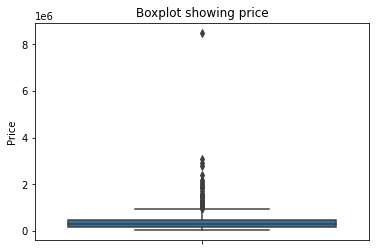

In [181]:
sns.boxplot(data=df , y = "Price")
plt.title("Boxplot showing price")
plt.show()

In [185]:
df = df[df.Price <6e6 ]

In [186]:
df.to_csv('cleaned_car.csv', index=False)

# Visulaization

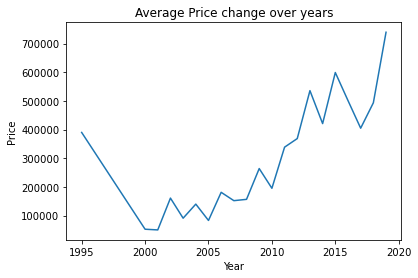

In [161]:
price_year = df.groupby('year')['Price'].mean()
price_year.plot()
plt.title("Average Price change over years")
plt.xlabel("Year")
plt.ylabel('Price')
plt.show()

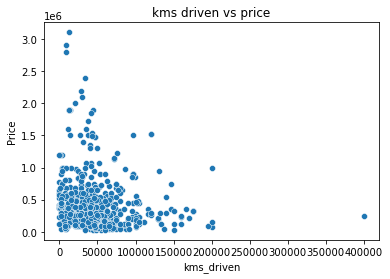

In [162]:
sns.scatterplot(data=df , x = 'kms_driven', y='Price')
plt.title("kms driven vs price")
plt.show()

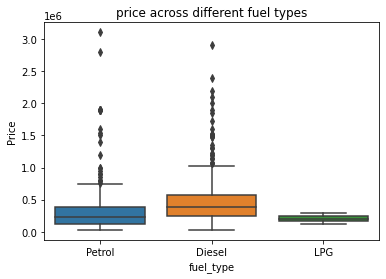

In [163]:
sns.boxplot(data=df , x='fuel_type' , y='Price')
plt.title("price across different fuel types")
plt.show()